# Tests for marginal and MAP behavior

Here, we generate two sets of data: the sinusoid, which is easier to inspect visually,
and a brownian path matching the assumptions of Kalman smoothing.  The measurement
variance in both cases and the true process variance (in the latter case; the former
is deterministic) are set in the next cell

We want to see (a) asymptotic efficiency (more data -> closer values).  Failing that,
we want to see whether setting x0 or sigma0 to the correct value helps.  Are problems caused by the equation itself or the optimization implementation?

# Sinusoidal Data

In [1]:
import numpy as np
import kal_exp
import matplotlib.pyplot as plt
from scipy import sparse

sigma_z = .1
sigma_x = 1

z1, x_true1, x_dot_true1, H1, times1 = kal_exp.gen_sine(
    20, stop=6, nt=20, meas_var=sigma_z
)
z2, x_true2, x_dot_true2, H2, times2 = kal_exp.gen_sine(
    20, stop=6, nt=40, meas_var=sigma_z
)
z3, x_true3, x_dot_true3, H3, times3 = kal_exp.gen_sine(
    20, stop=18, nt=60, meas_var=sigma_z
)

def plot_sol(times, z, x_true, x_dot_true, x_hat, x_dot_hat, title=""):
    fig = plt.figure(figsize=[6,3])
    fig.suptitle(title)
    fig.add_subplot(1,2,1)
    plt.plot(times, x_true, label="true")
    plt.plot(times, z, "rx")
    plt.plot(times, x_hat, label="estimated")
    plt.legend()

    fig.add_subplot(1,2,2)
    plt.plot(times, x_dot_true, label="true")
    plt.plot(times, x_dot_hat, label="estimated")
    plt.legend()

## Show Basic Kalman Method works

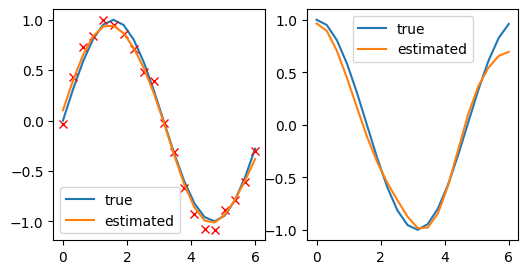

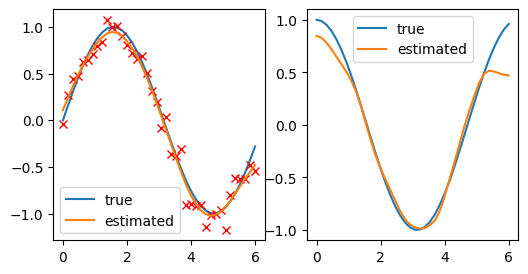

In [2]:
x_hat1, x_dot_hat1, _, _ = kal_exp.solve(z1, H1, times1, sigma_z, sigma_x)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _ = kal_exp.solve(z2, H2, times2, sigma_z, sigma_x)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2)

## Does Marginal Likelihood work, and does it improve with more data?

feval: 95.043 σ² estimated as 5.5e+01
feval: 92.505 σ² estimated as 3.2e+01
feval: 90.965 σ² estimated as 2.1e+01
feval: 90.204 σ² estimated as 1.6e+01
feval: 89.901 σ² estimated as 1.3e+01
feval: 89.803 σ² estimated as 1.1e+01
feval: 89.776 σ² estimated as 1.1e+01
feval: 89.77 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ² estimated as 1e+01
feval: 89.769 σ

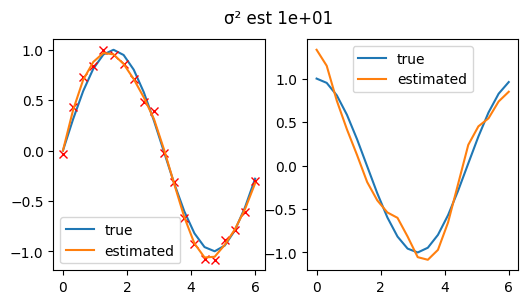

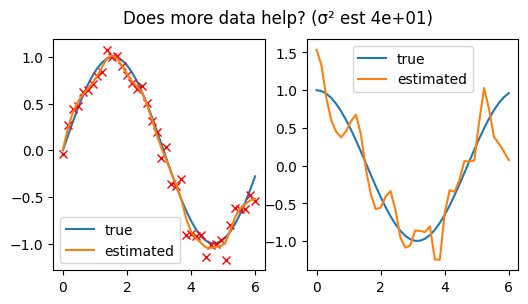

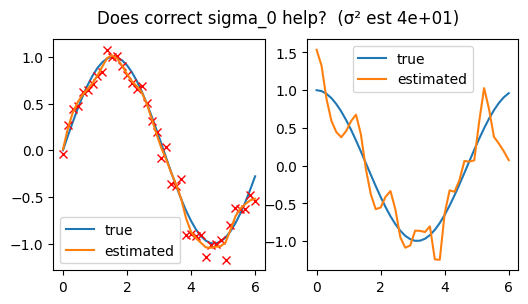

In [3]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_marginal(
    z1, H1, times1, sigma_z, sigma0=.1
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1,
f"\u03C3\u00B2 est {sigma_hat_1:.2}"
)

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=.1
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2,
f"Does more data help? (\u03C3\u00B2 est {sigma_hat_2:.2})"
)

x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=sigma_x
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b,
f"Does correct sigma_0 help?  (\u03C3\u00B2 est {sigma_hat_2b:.2})")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b)

### Conclusions:
More data, if anything has a deletrious effect, as sigma_hat goes from 10 to 40.  Starting with the correct sigma_0 doesn't help

## Does MAP work, and does it improve with more data?

feval:  inf
feval:  [[16.6364503]]
feval:  [[13.98149659]]
linesearch not found
decreasing learning rate to  0.0001
feval:  [[43.2020407]]
linesearch not found
decreasing learning rate to  1e-05
feval:  [[93.49856463]]
feval:  [[91.34883388]]
feval:  [[91.12373474]]
feval:  [[90.897202]]
feval:  [[90.669212]]
feval:  [[90.43974052]]
feval:  [[90.20876273]]
feval:  [[89.9762532]]
feval:  [[89.74218586]]
feval:  [[89.506534]]
feval:  [[89.26927023]]
feval:  [[89.03036645]]
feval:  [[88.78979387]]
feval:  [[88.54752293]]
feval:  [[88.30352332]]
feval:  [[88.0577639]]
feval:  [[87.81021275]]
feval:  [[87.56083707]]
feval:  [[87.30960318]]
feval:  [[87.05647648]]
feval:  [[86.80142145]]
feval:  [[86.54440154]]
feval:  [[86.28537922]]
feval:  [[86.0243159]]
feval:  [[85.76117188]]
feval:  [[85.49590632]]
feval:  [[85.22847722]]
feval:  [[84.95884133]]
feval:  [[84.68695416]]
feval:  [[84.41276987]]
feval:  [[84.13624125]]
feval:  [[83.85731966]]
feval:  [[83.575955]]
feval:  [[83.29209558]]


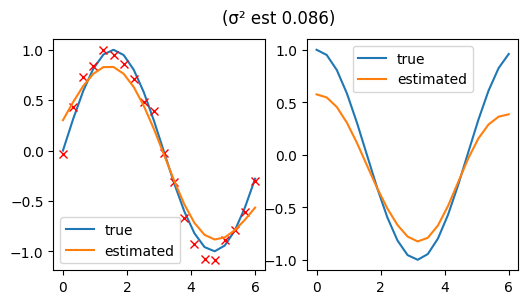

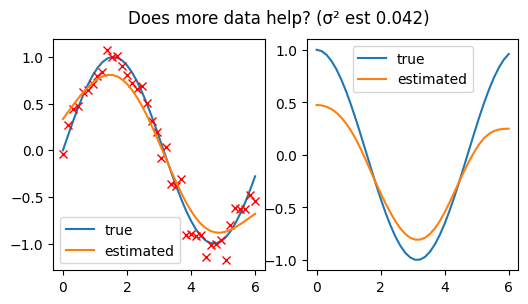

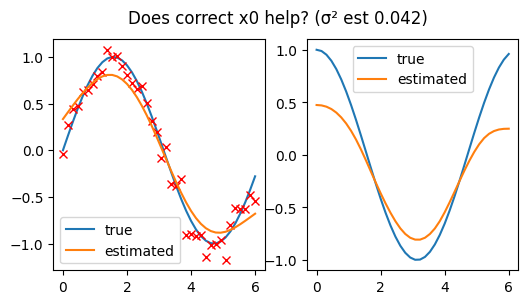

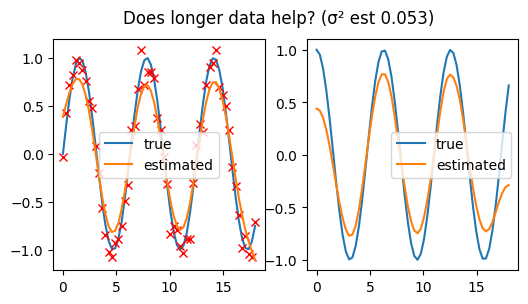

In [4]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_prior(
    z1, H1, times1, sigma_z, maxiter=10000
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1, 
f"(\u03C3\u00B2 est {sigma_hat_1:.2})")

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2, 
f"Does more data help? (\u03C3\u00B2 est {sigma_hat_2:.2})")

x0=kal_exp.restack(x_true2, x_dot_true2).reshape((-1,1))
x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, x0=x0, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b,
f"Does correct x0 help? (\u03C3\u00B2 est {sigma_hat_2b:.2})")

x0=kal_exp.restack(x_true2, x_dot_true2).reshape((-1,1))
x_hat3, x_dot_hat3, _, _, sigma_hat_3 = kal_exp.solve_prior(
    z3, H3, times3, sigma_z, maxiter=10000
)
plot_sol(times3, z3, x_true3, x_dot_true3, x_hat3, x_dot_hat3,
f"Does longer data help? (\u03C3\u00B2 est {sigma_hat_3:.2})")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b, sigma_hat_3)

### Conclusions
More data doesn't help (sigma_hat goes higher with more data, beyond 1).  starting with the correct x0 makes the solution stay close, the calculated sigma0 is odd.  Maybe this is stopping too soon?  Maybe hard to tell because there is no true sigma in this case?

# Brownian Simulated Data

In [5]:
z1, x_true1, x_dot_true1, H1, times1 = kal_exp.gen_data(
    30, stop=6, nt=20, meas_var=sigma_z, process_var=sigma_x
)
z2, x_true2, x_dot_true2, H2, times2 = kal_exp.gen_data(
    30, stop=6, nt=40, meas_var=sigma_z
)
z3, x_true3, x_dot_true3, H3, times3 = kal_exp.gen_data(
    30, stop=6, nt=60, meas_var=sigma_z
)

## Basic Kalman Smoothing

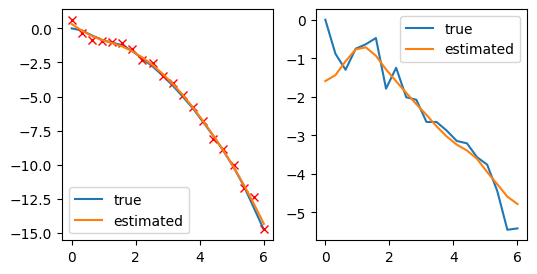

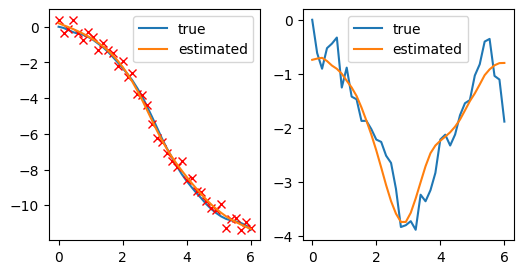

In [6]:
x_hat1, x_dot_hat1, _, _ = kal_exp.solve(z1, H1, times1, sigma_z, sigma_x)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _ = kal_exp.solve(z2, H2, times2, sigma_z, sigma_x)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2)


## Marginal, increasing timestep

feval: 95.879 σ² estimated as 5.5e+01
feval: 93.919 σ² estimated as 3.2e+01
feval: 93.129 σ² estimated as 2.1e+01
feval: 93.147 σ² estimated as 1.6e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.083 σ² estimated as 1.7e+01
feval: 93.07 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067 σ² estimated as 1.8e+01
feval: 93.067

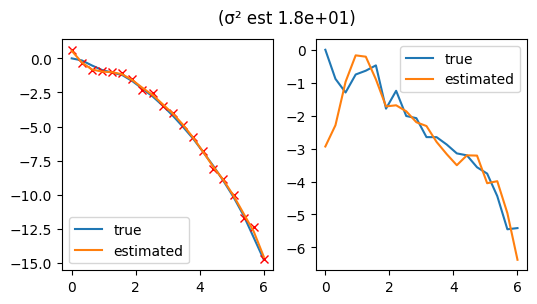

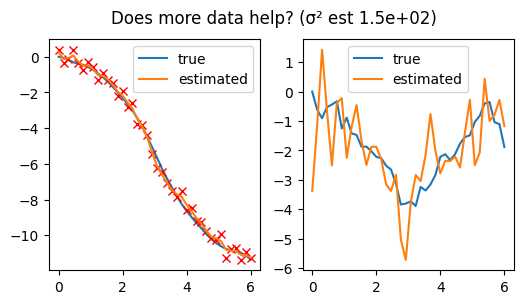

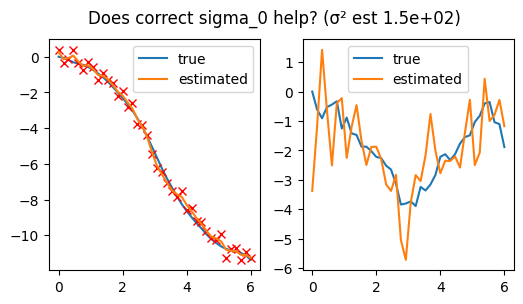

In [7]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_marginal(
    z1, H1, times1, sigma_z, sigma0=.1
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1,
f"(\u03C3\u00B2 est {sigma_hat_1:.2})")

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=.1
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2,
f"Does more data help? (\u03C3\u00B2 est {sigma_hat_2:.2})")

x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=sigma_x
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b,
f"Does correct sigma_0 help? (\u03C3\u00B2 est {sigma_hat_2b:.2})")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b)

### Conclusions
As seen in the sinusoidal case, while it "fits" the data, it does not find the correct sigma and more data (or an exact sigma0 guess) does not help

## MAP, increasing Data

feval:  inf
feval:  [[16.6364503]]
feval:  [[-321.66633497]]
feval:  [[-594.65276283]]
feval:  [[-942.8632808]]
feval:  [[-1230.43989708]]
feval:  [[-1531.85901235]]
feval:  [[-1811.89632057]]
feval:  [[-2079.81238941]]
feval:  [[-2337.57353572]]
feval:  [[-2586.04548484]]
feval:  [[-2825.60277602]]
feval:  [[-3056.45360432]]
feval:  [[-3278.82119277]]
feval:  [[-3492.94231966]]
feval:  [[-3699.0624124]]
feval:  [[-3897.43158124]]
feval:  [[-4088.30153557]]
feval:  [[-4271.92323529]]
feval:  [[-4448.5451268]]
feval:  [[-4618.41183391]]
feval:  [[-4781.76319924]]
feval:  [[-4938.83359465]]
feval:  [[-5089.85143787]]
feval:  [[-5235.03886735]]
feval:  [[-5374.61153858]]
feval:  [[-5508.77851367]]
feval:  [[-5637.74222268]]
feval:  [[-5761.69848001]]
feval:  [[-5880.83654284]]
feval:  [[-5995.33920173]]
feval:  [[-6105.38289548]]
feval:  [[-6211.13784401]]
feval:  [[-6312.76819461]]
feval:  [[-6410.43217758]]
feval:  [[-6504.28226835]]
feval:  [[-6594.4653536]]
feval:  [[-6681.1228996]]
f

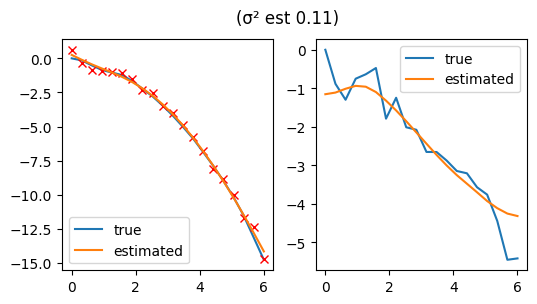

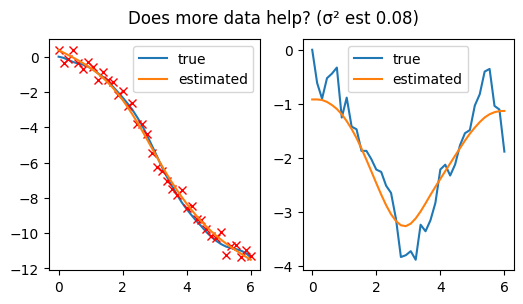

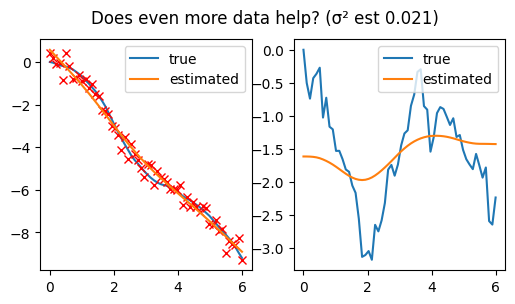

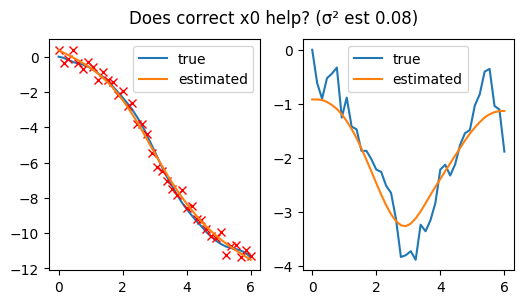

In [8]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_prior(
    z1, H1, times1, sigma_z, maxiter=10000
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1,
f"(\u03C3\u00B2 est {sigma_hat_1:.2})")

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2,
f"Does more data help? (\u03C3\u00B2 est {sigma_hat_2:.2})")

x_hat3, x_dot_hat3, _, _, sigma_hat_3 = kal_exp.solve_prior(
    z3, H3, times3, sigma_z, maxiter=10000
)
plot_sol(times3, z3, x_true3, x_dot_true3, x_hat3, x_dot_hat3, 
f"Does even more data help? (\u03C3\u00B2 est {sigma_hat_3:.2})")

x0=kal_exp.restack(x_true2, x_dot_true2).reshape((-1,1))
x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, x0=x0, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b, 
f"Does correct x0 help? (\u03C3\u00B2 est {sigma_hat_2b:.2})")

print(sigma_hat_1, sigma_hat_2, sigma_hat_3, sigma_hat_2b)

### Conclusions
This case performs substantially better than the sinusoidal data case, and I'm unsure why.  Yes, starting at x0 was helpful to find x but not sigma.  However, more data still did not help find sigma.


# Overall Conclusions
Neither method is demonstrating asymptotic efficiency.  Unsure what's going on with marginal likelihood.  Perhaps MAP likelihood is getting caught in a local minimum? (which by motivation, shouldn't happen?) Also, it looks like the derivative is relatively unrelated to the fit trajectory, as if all of the process loss is going into xdot | x and x_dot